In [35]:
import sympy as sp
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### 使用SymPy进行符号验证

In [13]:
# 为系数定义符号变量
c1, c2, c3 = sp.symbols('c1 c2 c3')
c = sp.Matrix([c1, c2, c3])
c

Matrix([
[c1],
[c2],
[c3]])

In [8]:
# 用线性无关列向量创建一个SymPy矩阵
A_independent = sp.Matrix(
    [[1, 0, 0],
    [2, -1, 3],
    [0 ,1 ,0]])
A_independent

Matrix([
[1,  0, 0],
[2, -1, 3],
[0,  1, 0]])

In [10]:
# 构建一个齐次方程组 Ac = 0
homogeneous_eq = sp.Eq(A_independent * c, sp.zeros(3, 1))
homogeneous_eq

Eq(Matrix([
[              c1],
[2*c1 - c2 + 3*c3],
[              c2]]), Matrix([
[0],
[0],
[0]]))

In [12]:
# 解系数未知数方程
solution = sp.solve(homogeneous_eq, (c1, c2, c3))
print(f"Solution for the independent case: {solution}")

Solution for the independent case: {c1: 0, c2: 0, c3: 0}


In [16]:
# 线性相关的情况
# todo
# 用线性无关列向量创建一个SymPy矩阵
A_dependent = sp.Matrix(
    [[1, 0, 0],
    [2, -1, 3],
    [3 ,-1 ,3]])

homogeneous_eq_dep = sp.Eq(A_dependent * c, sp.zeros(3, 1))
solution_dep = sp.solve(homogeneous_eq_dep, (c1, c2, c3))
print(f"Solution for the dependent case: {solution_dep}")

Solution for the dependent case: {c1: 0, c2: 3*c3}


### 两种检验方法对比

In [17]:
def is_independent_det(matrix, tolerance=1e-9):
    """
    使用行列式检验线性相关性
    WARNING: This method is numerically unstable.
    """
    if matrix.shape!= matrix.shape:
        print("Determinant method only works for square matrices.")
        return False
    
    det = np.linalg.det(matrix)
    return abs(det) > tolerance

In [25]:
def is_independent_rank(matrix):
    """
    使用矩阵的秩检验线性相关
    This is the numerically stable and recommended method.
    """
    rank = np.linalg.matrix_rank(matrix)
    num_vectors = matrix.shape[1]
    return rank == num_vectors

In [31]:
# 测试
v1 = np.array([1, 0])
v2 = np.array([1, 1e-10])

A = np.column_stack((v1, v2))
print(A)

[[1.e+00 1.e+00]
 [0.e+00 1.e-10]]


In [32]:
is_independent_det(A, tolerance=1e-9)

False

In [33]:
is_independent_rank(A)

True

### 图像的线性组合

所有图像已生成并保存成功！


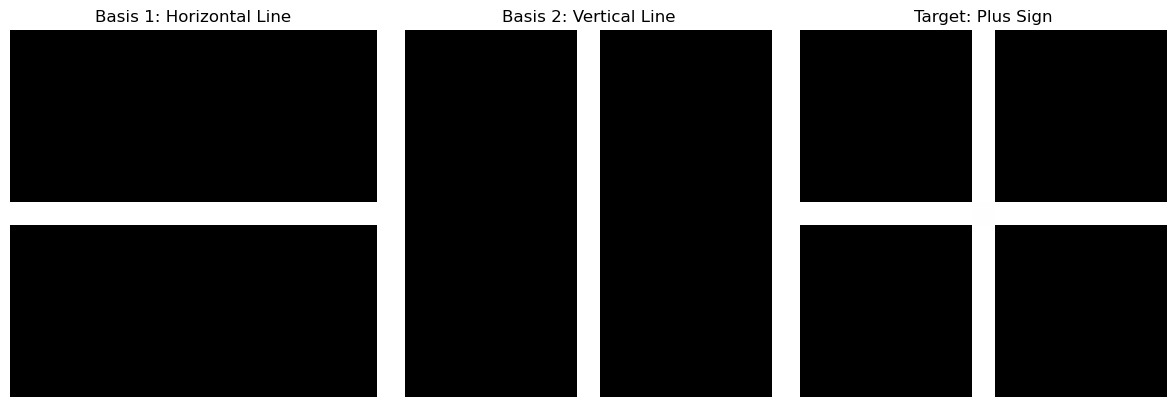

矩阵A的形状: (1024, 2)
目标向量t的形状: (1024,)
计算得到的系数: [0.9409458 0.9409458]
残差: [3.5571477]
矩阵A的秩: 2


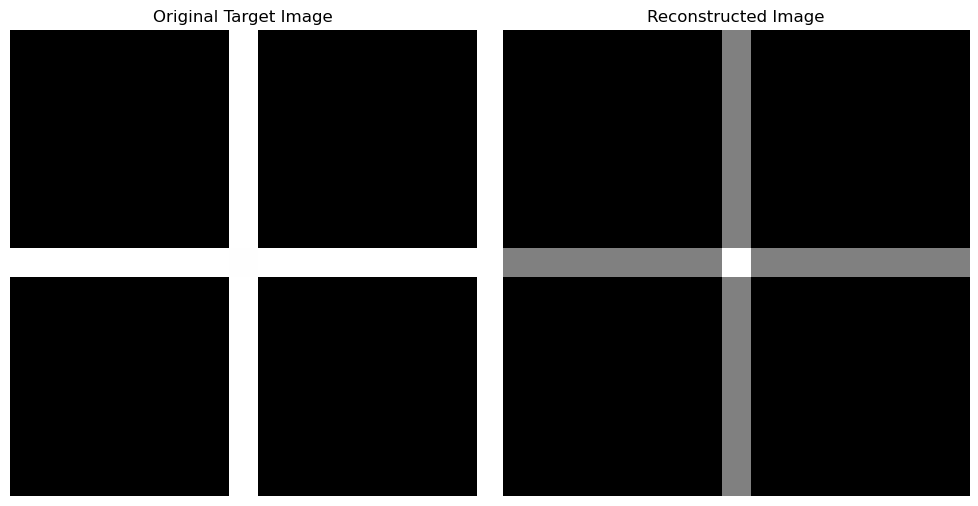

重构均方误差(MSE): 0.003473777323961258


In [40]:
import os

image_dir = "./images/lab4"
os.makedirs(image_dir, exist_ok=True)

# =============================================================================
# 步骤1: 设置和数据生成
# =============================================================================

def create_and_save_images():
    """
    生成并保存基图像和目标图像
    创建32x32像素的灰度图像，包括水平线、垂直线、加号等
    """

    # 设置图像尺寸
    image_size = (32, 32)
    
    # 创建水平线图像
    # 在图像的第15-16行设置为白色(255)，其余为黑色(0)
    h_line = np.zeros(image_size, dtype=np.uint8)
    h_line[15:17, :] = 255  # 设置第15-16行为白色
    Image.fromarray(h_line).save(f"{image_dir}/horizontal_line.png")
    
    # 创建垂直线图像
    # 在图像的第15-16列设置为白色(255)
    v_line = np.zeros(image_size, dtype=np.uint8)
    v_line[:, 15:17] = 255  # 设置第15-16列为白色
    Image.fromarray(v_line).save(f"{image_dir}/vertical_line.png")
    
    # 创建加号目标图像
    # 加号是水平线和垂直线的组合
    plus = h_line + v_line
    Image.fromarray(plus).save(f"{image_dir}/plus.png")
    
    # 创建对角线图像（可选，用于后续扩展）
    diag = np.zeros(image_size, dtype=np.uint8)
    for i in range(32):
        diag[i, i] = 255
        if i+1 < 32:
            diag[i, i+1] = 255
    Image.fromarray(diag).save(f"{image_dir}/diagonal_line.png")
    
    # 创建反对角线图像
    anti_diag = np.zeros(image_size, dtype=np.uint8)
    for i in range(32):
        anti_diag[i, 31-i] = 255
        if 31-i-1 >= 0:
            anti_diag[i, 31-i-1] = 255
    Image.fromarray(anti_diag).save(f"{image_dir}/anti_diagonal_line.png")
    
    # 创建X形目标图像
    x_shape = diag + anti_diag
    Image.fromarray(x_shape).save(f"{image_dir}/x_shape.png")
    
    print("所有图像已生成并保存成功！")

# 执行图像生成函数
create_and_save_images()

# =============================================================================
# 步骤2: 加载和可视化数据
# =============================================================================

# 加载图像文件
h_line_img = plt.imread(f"{image_dir}/horizontal_line.png")
v_line_img = plt.imread(f"{image_dir}/vertical_line.png")
plus_img = plt.imread(f"{image_dir}/plus.png")

# 创建可视化子图
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# 显示水平线基图像
axes[0].imshow(h_line_img, cmap='gray')
axes[0].set_title('Basis 1: Horizontal Line')
axes[0].axis('off')

# 显示垂直线基图像
axes[1].imshow(v_line_img, cmap='gray')
axes[1].set_title('Basis 2: Vertical Line')
axes[1].axis('off')

# 显示目标图像（加号）
axes[2].imshow(plus_img, cmap='gray')
axes[2].set_title('Target: Plus Sign')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# =============================================================================
# 步骤3: 矢量化和系统组装
# =============================================================================

# 基图像文件名列表
basis_filenames = [f'{image_dir}/horizontal_line.png', f'{image_dir}/vertical_line.png']
target_filename = f'{image_dir}/plus.png'

# 矢量化基图像并构建矩阵A
# 将每个基图像展平为一维向量，然后按列堆叠成矩阵
basis_vectors = []
for filename in basis_filenames:
    # 加载图像并展平为向量
    img_vector = plt.imread(filename).flatten()
    basis_vectors.append(img_vector)

# 将基向量堆叠成矩阵A（每列是一个基向量）
A = np.column_stack(basis_vectors)

# 矢量化目标图像
t = plt.imread(target_filename).flatten()

# 打印矩阵和向量的形状信息
print(f"矩阵A的形状: {A.shape}")  # 应该是(1024, 2)，因为32x32=1024像素，2个基图像
print(f"目标向量t的形状: {t.shape}")  # 应该是(1024,)

# =============================================================================
# 步骤4: 用最小二乘法求解系数
# =============================================================================

# 使用最小二乘法求解线性系统 A*c = t
# 这种方法对于目标图像可能不完全在基图像张成空间中的情况具有鲁棒性
c, residuals, rank, s = np.linalg.lstsq(A, t, rcond=None)

# 打印计算得到的系数
print(f"计算得到的系数: {c}")
print(f"残差: {residuals}")  # 残差表示拟合的误差大小
print(f"矩阵A的秩: {rank}")  # 矩阵的秩表示线性无关的列数

# =============================================================================
# 步骤5: 重建与验证
# =============================================================================

# 使用求得的系数重构目标图像
# 计算线性组合: 重构向量 = c1*水平线 + c2*垂直线
reconstructed_vector = A @ c  # 矩阵乘法计算线性组合

# 将重构的向量重新整形为32x32图像
reconstructed_img = reconstructed_vector.reshape(32, 32)

# 创建可视化比较图
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 显示原始目标图像
axes[0].imshow(plus_img, cmap='gray')
axes[0].set_title('Original Target Image')
axes[0].axis('off')

# 显示重构图像
axes[1].imshow(reconstructed_img, cmap='gray')
axes[1].set_title('Reconstructed Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# 计算重构误差（均方误差）
mse = np.mean((plus_img - reconstructed_img) ** 2)
print(f"重构均方误差(MSE): {mse}")



问题：假设你的某个基图像本身就是另外两个基图像的线性组合(例如，"加号"作为基图像与水平线和垂直线一起被包含在内)。这将如何影响矩阵A的秩?当试图找到一个唯一的系数向量c来重构目标图像时，你可能会遇到什么问题?

回答：

1. 对矩阵A秩的影响：
   如果基图像集合中包含线性相关的图像（比如同时包含水平线、垂直线和加号），那么矩阵A的列将不是线性无关的。
   具体来说，加号图像可以表示为水平线和垂直线的线性组合（加号 = 水平线 + 垂直线）。
   在这种情况下，矩阵A的秩会小于基图像的数量。如果原本有3个基图像但其中一个是另外两个的线性组合，那么矩阵A的秩最多为2。

2. 求解唯一系数向量时可能遇到的问题：
   a) 解不唯一：当矩阵A的列线性相关时，线性系统 A*c = t 可能有无穷多解。
      这意味着存在多个不同的系数组合都可以精确重构目标图像。
   
   b) 数值稳定性问题：即使使用最小二乘法，当矩阵接近奇异（秩亏）时，求解过程可能变得不稳定，
      对小的噪声或数值误差非常敏感。
   
   c) 物理意义不明确：在图像重构应用中，我们希望系数能够反映每个基图像对目标图像的贡献程度。
      当基图像线性相关时，这种解释变得模糊不清。

3. 实际影响：
   在实际的图像重构任务中，我们应该选择一组线性无关的基图像来确保矩阵A是列满秩的。
   这样可以保证系数解的唯一性和稳定性，同时也使得每个基图像的贡献具有明确的物理意义。

结论：基图像的选择应该确保它们彼此线性无关，这样才能构建一个良定的重构问题。